<a href="https://colab.research.google.com/github/UrsulaM25/ProyectoParteIII_Macedo/blob/main/ProyectoParteIII_Macedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Introducción

Analizar la demanda de energía eléctrica permite detectar tendencias y estacionalidades. Esta información es muy útil para gestionar la demanda de manera eficiente, prever picos de consumo y planificar en consecuencia reduciendo riesgos de desabastecimiento.

Los sectores industriales y comeraciales suelen concentrar su actividad en loss dias habiles, incrementando su demanda durante las horas pico (18 a 22 Hs).
La planificación y asignación de los recursos energéticos pueden verse afectadas si la demanda en picos no se gestiona correctamente entre días hábiles y no hábiles y puede generar sobrecostos por generación innecesaria o incluso riesgos de corte de suministro.

* Data Set

Se seleccionó un dataframe que contiene datos de demanda de energía eléctrica de Argentina desde el año 2022 hasta febrero de 2025, los mismos provienen de la página de CAMMESA (organismo encargado de operar el mercado eléctrico mayorista de Argentina). Sus columnas contienen los siguientes datos:

  * Año: año de demanda
  * mes: mes de demanda, formato mes-año
  * nummes
  * numdía
  * Tipodedía: hábil, no hábil
  * día: Dia de la semana
  * fecha: formato día/mes/año
  * hora
  * GUMEM: Demanda de grandes usuarios en MWh, la misma está compuesta por la demanda de la categoría GUMA (Gran Usuario Mayorista Autogenerador) como ejemplo se pueden mencionar las demandas de las empresas Arcor, Acindar, aysa, molinos cañuelas, ypf entre otras.
  * Distribuidor: La categoría distribuidor comprende la demanda en MWh de la demanda estacional y las GUMEs (Grandes Usuarios Menores) como ejemplo se pueden mencionar cooperativas, Edelap, Edenor, Edesur, EPEC entre otros.
  * DEMANDALOCAL: La demanda local es la suma de las demandas GUMEM y Distribuidor

  * Demanda en MWh de las siguientes provincias: BUENOSAIRES,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRERIOS,FORMOSA,JUJUY,LAPAMPA,LARIOJA,MENDOZA,MISIONES,NEUQUEN,RIONEGRO,SALTA,SANJUAN,SANLUIS SANTACRUZ,SANTAFE,SGODELESTERO,TUCUMAN

# 1.1 Importar Librerias

In [237]:
#importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc

#Libreria para visualizacion datos nulos
import missingno as msno

#Libreria para eliminar warnings
import warnings
warnings.filterwarnings('ignore')

#Libreria de Scikit-learn para imputacion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split

#Configuraciones adicionales (opcional)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1.2 Carga de Datos

In [169]:
df = pd.read_csv ("https://raw.githubusercontent.com/UrsulaM25/ProyectoParteIII_Macedo/refs/heads/main/BaseDemandaDIARIA_EE_por_region_finalCVS.csv", delimiter=";",decimal=",")  # Especifico el delimitador y agrego el CSV

In [170]:
df.shape #tamaño de dataframe

(27720, 33)

In [171]:
df.size #Cantidad de datos

914760

In [172]:
df.info () #Info df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AÑO           27720 non-null  int64  
 1   MES           27720 non-null  object 
 2   NUMMES        27720 non-null  int64  
 3   NUMDIA        27720 non-null  int64  
 4   TIPODIA       27720 non-null  object 
 5   DIA           27720 non-null  object 
 6   FECHA         27720 non-null  object 
 7   HORA          27720 non-null  int64  
 8   GUMEM         27720 non-null  float64
 9   DISTRIBUIDOR  27720 non-null  float64
 10  DEMANDALOCAL  27720 non-null  float64
 11  BUENOSAIRES   27720 non-null  float64
 12  CATAMARCA     27720 non-null  float64
 13  CHACO         27720 non-null  float64
 14  CHUBUT        27720 non-null  float64
 15  CORDOBA       27720 non-null  float64
 16  CORRIENTES    27720 non-null  float64
 17  ENTRERIOS     27720 non-null  float64
 18  FORMOSA       27720 non-nu

## 2.Hipótesis

Probabilidad de que una provincia experimente alta demanda en horas pico (18 a 22 hs) depende del tipo de día (hábil o no hábil)

## 3.Análisis Exploratorio de Datos: EDA

Verificar formatos y/o aplicar cambios

In [173]:
print(df.dtypes)  # Verificar el tipo de datos

AÑO               int64
MES              object
NUMMES            int64
NUMDIA            int64
TIPODIA          object
DIA              object
FECHA            object
HORA              int64
GUMEM           float64
DISTRIBUIDOR    float64
DEMANDALOCAL    float64
BUENOSAIRES     float64
CATAMARCA       float64
CHACO           float64
CHUBUT          float64
CORDOBA         float64
CORRIENTES      float64
ENTRERIOS       float64
FORMOSA         float64
JUJUY           float64
LAPAMPA         float64
LARIOJA         float64
MENDOZA         float64
MISIONES        float64
NEUQUEN         float64
RIONEGRO        float64
SALTA           float64
SANJUAN         float64
SANLUIS         float64
SANTACRUZ       float64
SANTAFE         float64
SGODELESTERO    float64
TUCUMAN         float64
dtype: object


Se cambian los tipos de datos enteros y la fecha

In [174]:
df["FECHA"] = pd.to_datetime(df["FECHA"], format="%d/%m/%Y") #Cambiar tipo de dato de fecha a fecha

df.dtypes['FECHA']

dtype('<M8[ns]')

In [175]:
print(df.dtypes)  # Verificar el tipo de datos

AÑO                      int64
MES                     object
NUMMES                   int64
NUMDIA                   int64
TIPODIA                 object
DIA                     object
FECHA           datetime64[ns]
HORA                     int64
GUMEM                  float64
DISTRIBUIDOR           float64
DEMANDALOCAL           float64
BUENOSAIRES            float64
CATAMARCA              float64
CHACO                  float64
CHUBUT                 float64
CORDOBA                float64
CORRIENTES             float64
ENTRERIOS              float64
FORMOSA                float64
JUJUY                  float64
LAPAMPA                float64
LARIOJA                float64
MENDOZA                float64
MISIONES               float64
NEUQUEN                float64
RIONEGRO               float64
SALTA                  float64
SANJUAN                float64
SANLUIS                float64
SANTACRUZ              float64
SANTAFE                float64
SGODELESTERO           float64
TUCUMAN 

In [176]:
df.head() #Visualizar df

,AÑO,MES,NUMMES,NUMDIA,TIPODIA,DIA,FECHA,HORA,GUMEM,DISTRIBUIDOR,DEMANDALOCAL,BUENOSAIRES,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRERIOS,FORMOSA,JUJUY,LAPAMPA,LARIOJA,MENDOZA,MISIONES,NEUQUEN,RIONEGRO,SALTA,SANJUAN,SANLUIS,SANTACRUZ,SANTAFE,SGODELESTERO,TUCUMAN
0,2022,ene-22,1,1,No Hábil,Sábado,2022-01-01,1,1266.46,14627.63,15894.08,7599.76,150.29,464.32,422.04,1175.47,449.83,512.50,233.80,148.61,111.13,172.13,670.47,353.22,229.30,222.13,304.77,263.73,183.49,119.24,1416.29,267.69,423.88
1,2022,ene-22,1,1,No Hábil,Sábado,2022-01-01,2,1264.15,14702.74,15966.89,7591.29,153.44,490.00,402.32,1183.88,463.48,528.20,240.17,145.82,99.23,177.94,669.20,365.76,220.90,214.24,299.58,262.04,179.65,117.52,1446.56,285.63,430.04
2,2022,ene-22,1,1,No Hábil,Sábado,2022-01-01,3,1295.91,14950.08,16246.00,7620.86,162.35,523.35,418.11,1208.95,479.94,555.71,249.00,143.51,106.24,185.91,659.62,374.39,216.26,205.95,296.18,267.70,176.93,116.24,1522.40,313.19,443.20
3,2022,ene-22,1,1,No Hábil,Sábado,2022-01-01,4,1294.95,15019.81,16314.76,7564.48,169.72,536.70,404.88,1217.33,488.90,572.64,249.81,142.31,102.07,193.44,657.69,367.99,208.11,196.83,291.18,277.83,173.15,113.59,1590.59,337.67,457.84
4,2022,ene-22,1,1,No Hábil,Sábado,2022-01-01,5,1291.20,14813.75,16104.95,7383.98,171.75,537.32,394.58,1211.88,488.01,575.28,247.67,137.78,98.69,199.32,648.01,363.40,189.02,190.73,284.07,284.80,172.80,111.94,1596.04,356.07,461.85


# 3.1 Verificar Valores Nulos

In [177]:

print("Valores Nulos por Columna:")
df.isnull().sum()

Valores Nulos por Columna:


,0
AÑO,0
MES,0
NUMMES,0
NUMDIA,0
TIPODIA,0
DIA,0
FECHA,0
HORA,0
GUMEM,0
DISTRIBUIDOR,0


Se verifica que el df no tiene valores nulos

# 3.2 Eliminación y creacion de columnas

En base a la Hipotesis: Se crea un nuevo df_pico. Tranformando las columnas de cada provincia en dos filas que reflejen la demanda de cada provincia por horario y a que provincia corresponde. Luego se filtran las horas pico (18 a 22 hs ), se mantienen las colimnas tipo de dia.

Crear un df_2 copia de df original para transformar los datos

In [178]:
df_2=df.copy()

#Se cean dos variables de columnas fijas y columnas a modificar
columnas_fijas = ["AÑO", "MES", "NUMMES", "NUMDIA", "TIPODIA", "DIA", "FECHA", "HORA","GUMEM","DISTRIBUIDOR","DEMANDALOCAL"]
columnas_provincias = ["BUENOSAIRES","CATAMARCA","CHACO","CHUBUT","CORDOBA","CORRIENTES","ENTRERIOS","FORMOSA","JUJUY","LAPAMPA","LARIOJA","MENDOZA","MISIONES","NEUQUEN","RIONEGRO","SALTA","SANJUAN","SANLUIS","SANTACRUZ","SANTAFE","SGODELESTERO","TUCUMAN"]

# Se usa melt para transformar el df_2
df_2_melted = df_2.melt(id_vars=columnas_fijas, value_vars=columnas_provincias,
                     var_name="PROVINCIAS", value_name="DEMANDAPROV")


print(df_2_melted.head())


    AÑO     MES  NUMMES  NUMDIA   TIPODIA     DIA      FECHA  HORA    GUMEM  \
0  2022  ene-22       1       1  No Hábil  Sábado 2022-01-01     1  1266.46   
1  2022  ene-22       1       1  No Hábil  Sábado 2022-01-01     2  1264.15   
2  2022  ene-22       1       1  No Hábil  Sábado 2022-01-01     3  1295.91   
3  2022  ene-22       1       1  No Hábil  Sábado 2022-01-01     4  1294.95   
4  2022  ene-22       1       1  No Hábil  Sábado 2022-01-01     5  1291.20   

   DISTRIBUIDOR  DEMANDALOCAL   PROVINCIAS  DEMANDAPROV  
0      14627.63      15894.08  BUENOSAIRES      7599.76  
1      14702.74      15966.89  BUENOSAIRES      7591.29  
2      14950.08      16246.00  BUENOSAIRES      7620.86  
3      15019.81      16314.76  BUENOSAIRES      7564.48  
4      14813.75      16104.95  BUENOSAIRES      7383.98  


In [179]:
df_3_melted= df_2_melted [['PROVINCIAS','HORA','TIPODIA','DEMANDAPROV']] # Se filtran columnas

In [180]:
df_pico = df_3_melted[df_3_melted['HORA'].isin([18, 19, 20, 21,22])] # Se filtan las horas pico

In [181]:
print(df_pico.head())

     PROVINCIAS  HORA   TIPODIA  DEMANDAPROV
17  BUENOSAIRES    18  No Hábil      5977.16
18  BUENOSAIRES    19  No Hábil      6063.20
19  BUENOSAIRES    20  No Hábil      6142.18
20  BUENOSAIRES    21  No Hábil      6673.39
21  BUENOSAIRES    22  No Hábil      7157.92


In [182]:
df_pico.shape #tamaño de dataframe

(127050, 4)

In [183]:
df_pico['TIPODIA'] = df_pico['TIPODIA'].replace({'No hábil':'No Hábil'}) #Normalizo formatos

In [184]:
df_pico.TIPODIA.value_counts()

,count
TIPODIA,
Hábil,85690
No Hábil,41360


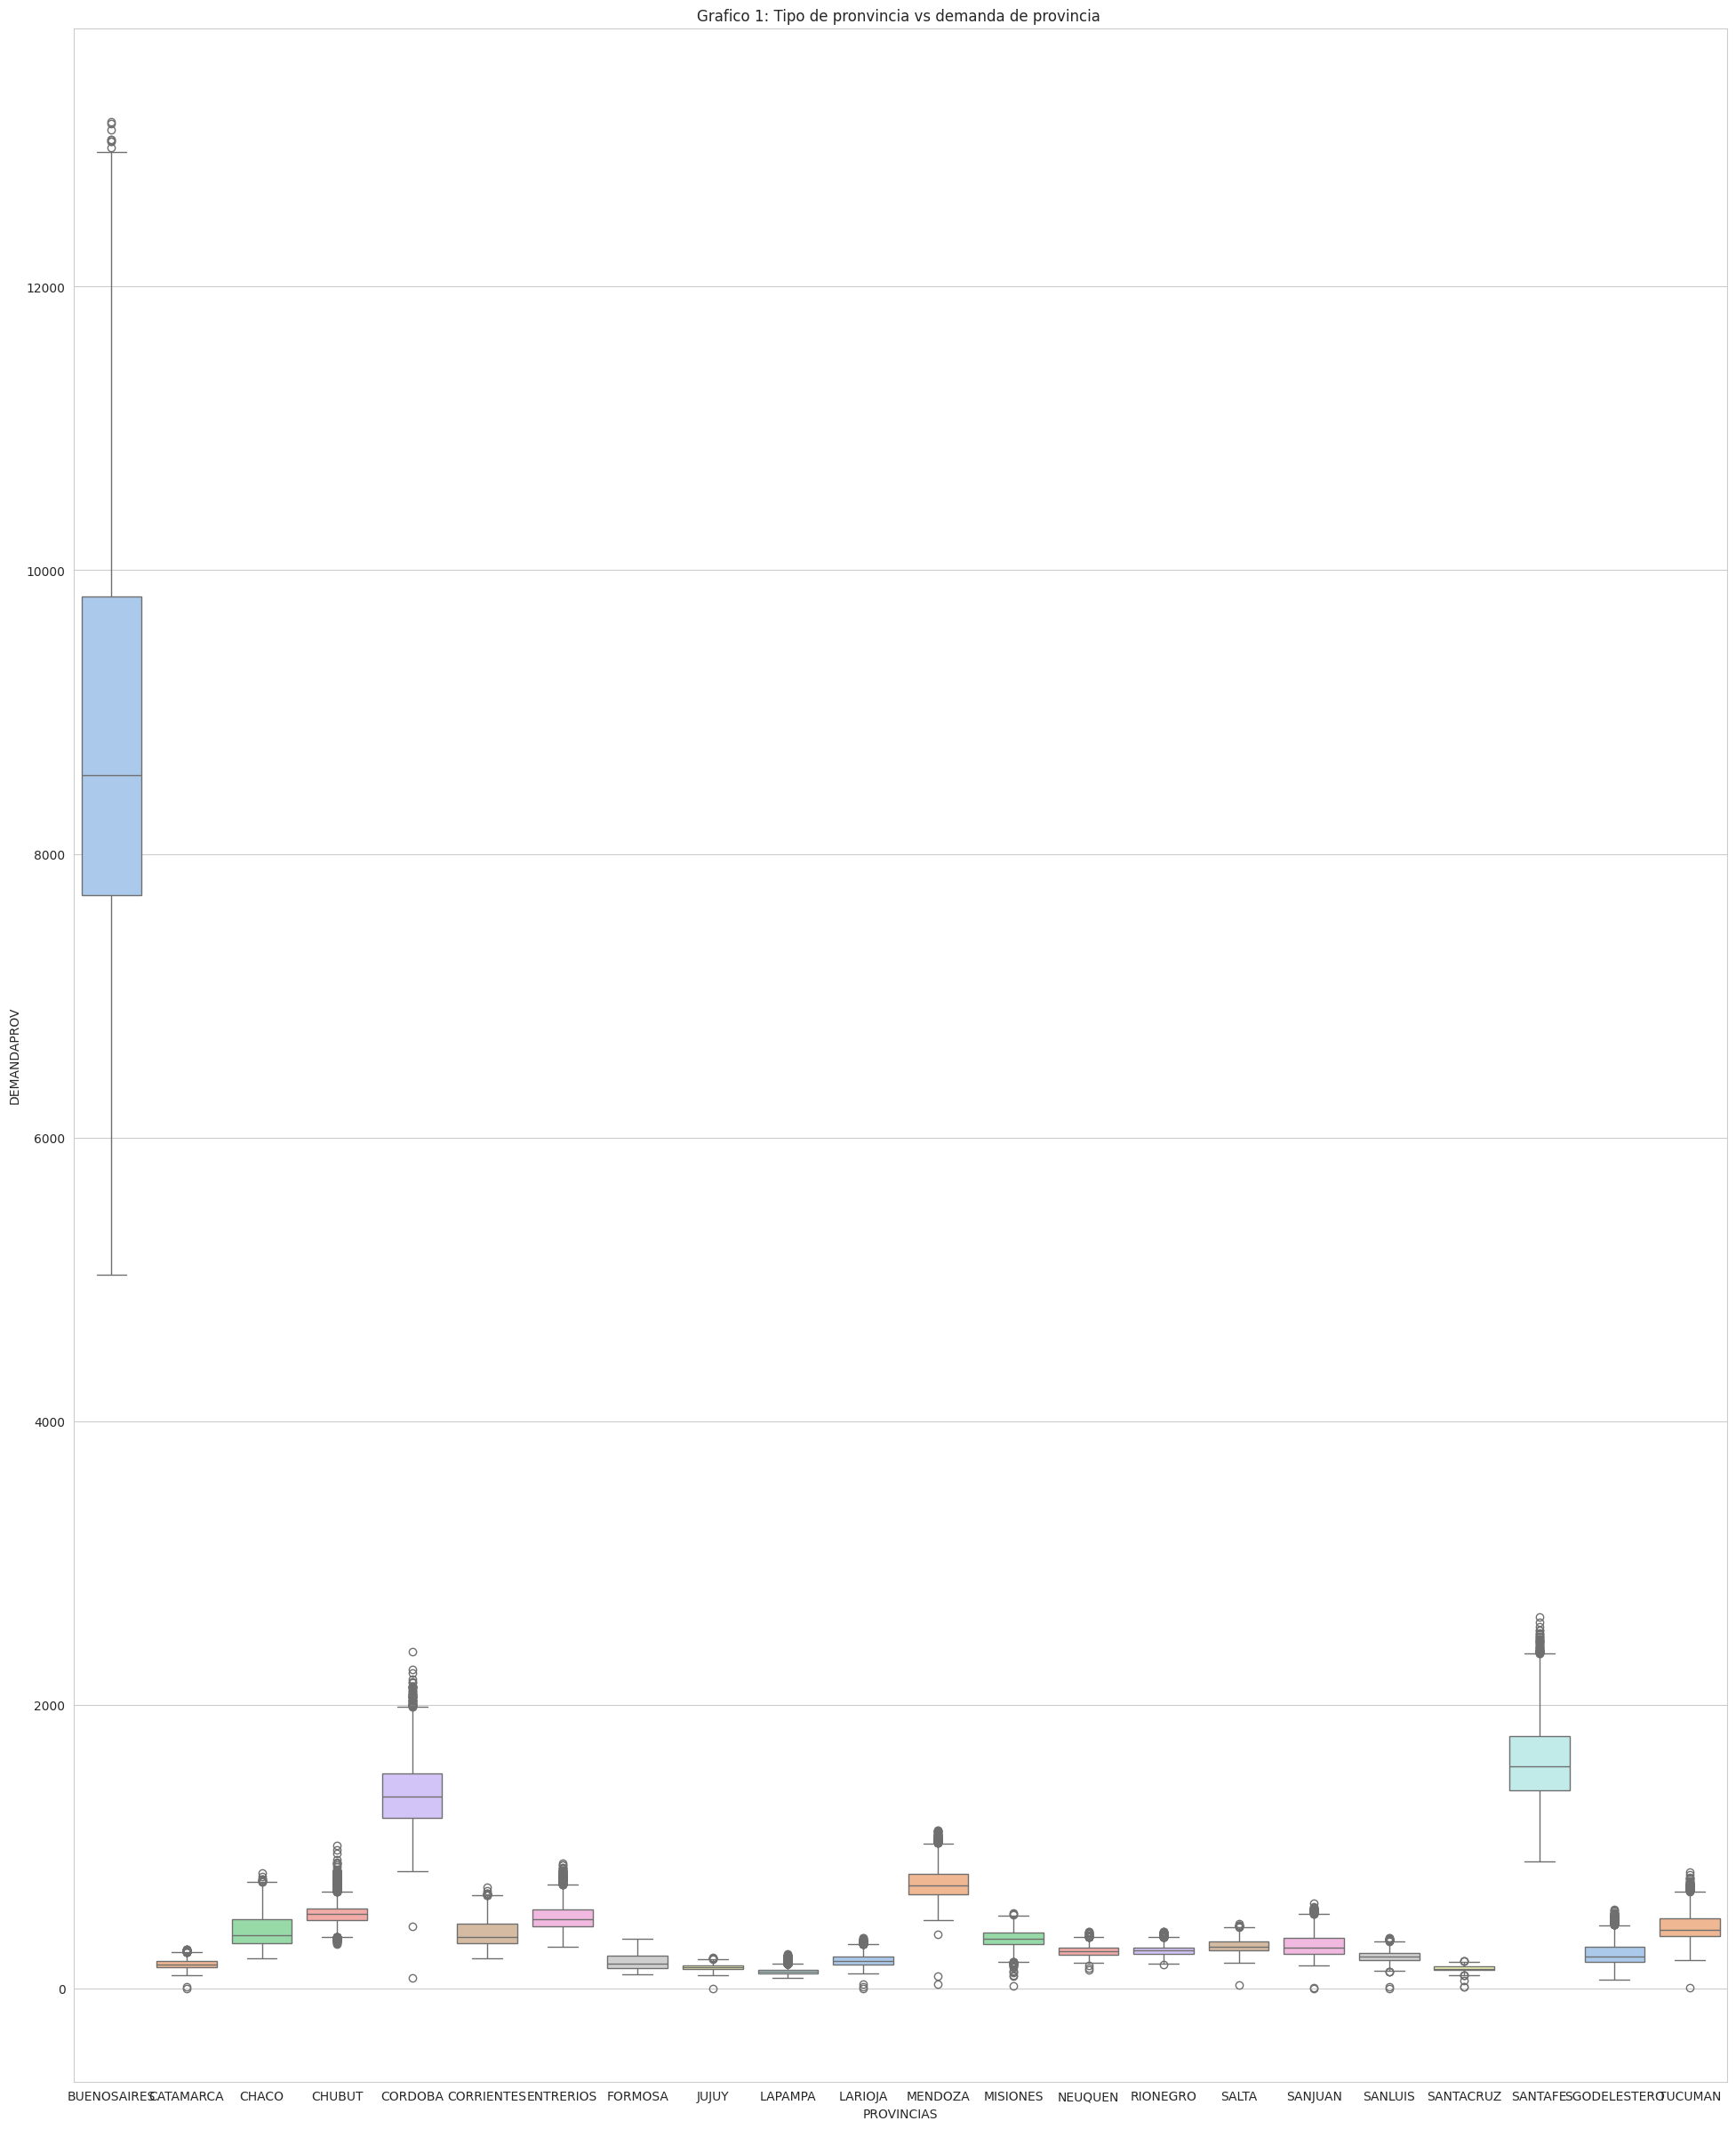

In [185]:
# Boxplots para variables pronvincia vs demandaprov para ver distribución
plt.figure(figsize=(24, 30))
sns.boxplot(x='PROVINCIAS', y='DEMANDAPROV', data=df_pico, palette='pastel')
plt.title("Grafico 1: Tipo de pronvincia vs demanda de provincia ")
plt.show()

En el grafico 1 se puede observar que el rango de demanda de Buenos Aires es muy superior al rango de demanda de las otras provincias seguida por cordoba y sanata fe. En base a este grafico se puede estimar que las provincias con mayor población son Buenos Aires, Cordoba y Santa Fe.

## 4.Generación de Target
Se crea target para las horas pico altademanda= 1, bajademanda=0.
Al tener cada provincia, un rango de demanda diferente, para identificar si la misma tiene alta o baja demanda, se calcula el valor al 80% de la distribución de datos.


In [186]:
p80_por_provincia = df_pico.groupby('PROVINCIAS')['DEMANDAPROV'].quantile(0.8)

In [187]:
p80_por_provincia.head() #Visualizar df

,DEMANDAPROV
PROVINCIAS,
BUENOSAIRES,10169.426
CATAMARCA,199.254
CHACO,517.642
CHUBUT,578.448
CORDOBA,1572.350


In [188]:
#Se asigna la variable target y se mapean los valores
df_pico['target'] = (df_pico['DEMANDAPROV'] > df_pico['PROVINCIAS'].map(p80_por_provincia)).astype(int)


In [189]:
print(df_pico.head())

     PROVINCIAS  HORA   TIPODIA  DEMANDAPROV  target
17  BUENOSAIRES    18  No Hábil      5977.16       0
18  BUENOSAIRES    19  No Hábil      6063.20       0
19  BUENOSAIRES    20  No Hábil      6142.18       0
20  BUENOSAIRES    21  No Hábil      6673.39       0
21  BUENOSAIRES    22  No Hábil      7157.92       0


In [191]:
df_pico.target.value_counts() #Distribucion de variable target

,count
target,
0,101643
1,25407


In [192]:
print("Estadísticas Descriptivas:")
df_pico.describe()

Estadísticas Descriptivas:


,HORA,DEMANDAPROV,target
count,127050.000000,127050.000000,127050.000000
mean,20.000000,805.501183,0.199976
std,1.414219,1814.761407,0.399984
min,18.000000,0.000000,0.000000
25%,19.000000,195.812500,0.000000
50%,20.000000,300.350000,0.000000
75%,21.000000,513.017500,0.000000
max,22.000000,13163.950000,1.000000


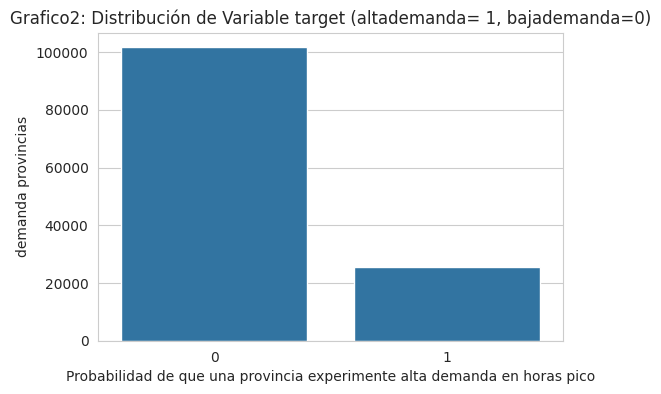

In [193]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_pico)
plt.title('Grafico2: Distribución de Variable target (altademanda= 1, bajademanda=0)')
plt.xlabel('Probabilidad de que una provincia experimente alta demanda en horas pico')
plt.ylabel('demanda provincias')
target_dist = df_pico['target'].value_counts(normalize=True) * 100

plt.show()

En el grafico 2 se puede observar que el df_pico esta desvalanceado, hay mas probabilidad de que las provincias tengan baja demanda para horas pico

Analisis de variables provincias vs target

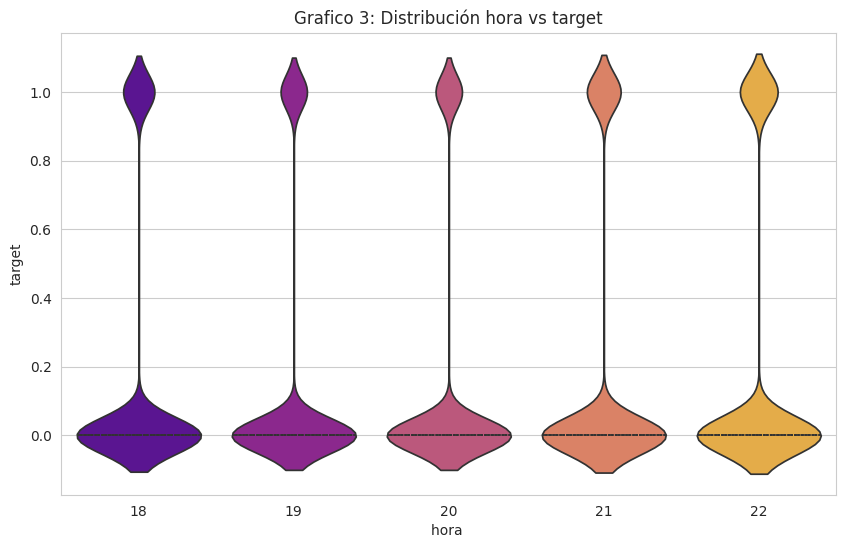

In [211]:
# Violinplot: Distribución hora vs target
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_pico, x='HORA', y='target', palette='plasma', inner='quartile') # inner='quartile' muestra los cuartiles dentro
plt.title('Grafico 3: Distribución hora vs target')
plt.xlabel('hora ')
plt.ylabel('target')
plt.show()

En el gráfico 3 se observa que la distribución de el taget para las diferentes horas es similar

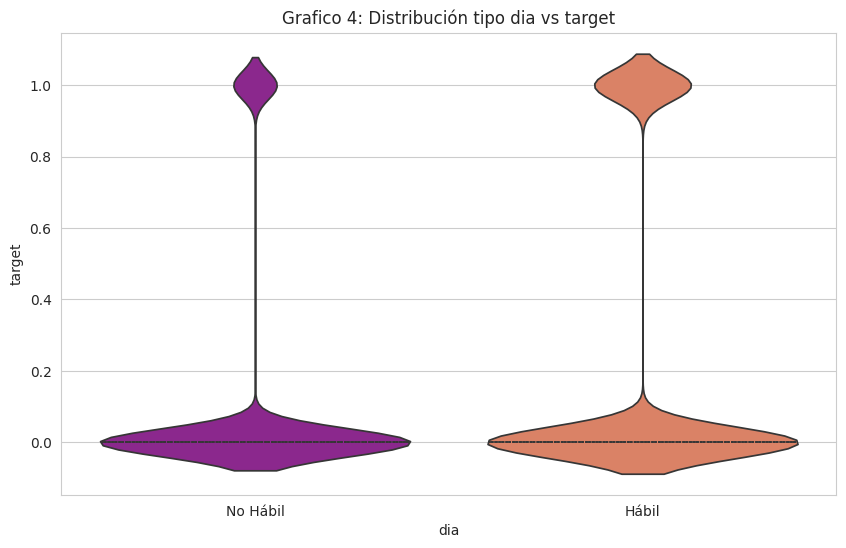

In [212]:
# Violinplot: Distribución Tipo dia vs target
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_pico, x='TIPODIA', y='target', palette='plasma', inner='quartile') # inner='quartile' muestra los cuartiles dentro
plt.title('Grafico 4: Distribución tipo dia vs target')
plt.xlabel('dia')
plt.ylabel('target')
plt.show()

En el gráfico 4 se observa que la distribución de el taget para los dias habiles y no habiles son similares. Sin embargo para los dias habiles la distribución de los datos con taget 1 (altademanda) es mayor. Se puede deducir que en los dias habiles hay mayor demanda

## 6.Preprocesamiento de Datos

In [216]:
# Definir las características (X) y la variable objetivo (y)
X = df_pico[['PROVINCIAS', 'HORA', 'TIPODIA', 'DEMANDAPROV']]
y = df_pico['target']

In [214]:
# Crear el preprocesador usando ColumnTransformer

# 1. OneHotEncoder para las variables categóricas
#    handle_unknown='ignore' es útil si aparecen valores en test que no estaban en train.
#    drop='first' puede usarse para evitar multicolinealidad, aunque RF es menos sensible. Lo omitimos por simplicidad.
# StandardScaler para las variables numéricas continuas.

#Definir variables
categorical_features_for_encoding= ['PROVINCIAS', 'TIPODIA']
numerical_features_for_scaling = ['DEMANDAPROV']



preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_for_scaling),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding)
    ],
    remainder='passthrough' # Si hubiera columnas no especificadas, las dejaría pasar
    # O usa remainder='drop' si quieres asegurar que solo se usen las especificadas
)



In [215]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(), ['DEMANDAPROV']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['PROVINCIAS', 'TIPODIA'])])

## 7.División de datos

Se separan los datos en conjuntos de entrenamiento y prueba.

In [199]:
# Dividir los datos ANTES de aplicar el preprocesamiento (específicamente el escalado)
# Usamos stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [200]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (95287, 4)
Tamaño del conjunto de prueba (X_test): (31763, 4)
Tamaño del conjunto de entrenamiento (y_train): (95287,)
Tamaño del conjunto de prueba (y_test): (31763,)


In [217]:
print("\nDistribución de la variable objetivo en Train vs Test:")
print(f"Train: \n{y_train.value_counts(normalize=True)}")
print(f"Test: \n{y_test.value_counts(normalize=True)}")


Distribución de la variable objetivo en Train vs Test:
Train: 
target
0    0.800025
1    0.199975
Name: proportion, dtype: float64
Test: 
target
0    0.800019
1    0.199981
Name: proportion, dtype: float64


## 8.Construcción y Entrenamiento del Modelo (RandomForestClassifier)

In [202]:
# Crear el pipeline: incluye el preprocesador y el clasificador
# Esto asegura que el preprocesamiento se ajuste ("fit") SOLO en los datos de entrenamiento
# y luego se aplique ("transform") tanto a los datos de entrenamiento como a los de prueba.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
    # n_estimators: número de árboles en el bosque. 100 es un buen punto de partida.
    # random_state: para reproducibilidad.
    # class_weight='balanced': útil si las clases están desbalanceadas, ajusta pesos inversamente proporcional a la frecuencia.
])

# Entrenar el pipeline completo (preprocesamiento + modelo)
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['DEMANDAPROV']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PROVINCIAS', 'TIPODIA'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

## 9.Evaluación del Modelo

In [203]:
# Realizar predicciones en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (1)

# 9.1 Accuracy

In [205]:
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Accuracy Score ---")
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

--- Accuracy Score ---
Accuracy en el conjunto de prueba: 0.9991


Con accuracy 0,99 se indica que el modelo clasifica correctamente los datos de pruebaen un 99%

#9.2 Matriz de confusión


--- Matriz de Confusión ---


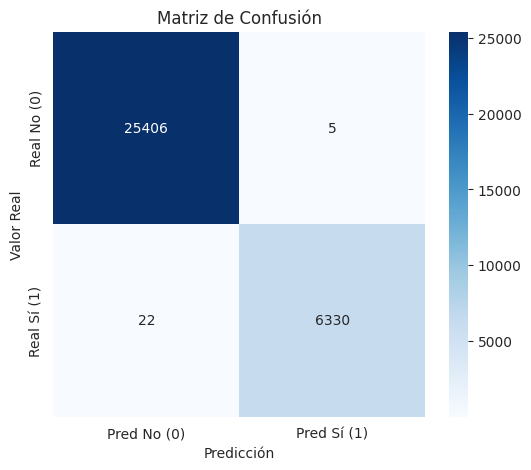

Verdaderos Negativos (TN): 25406
Falsos Positivos (FP): 5
Falsos Negativos (FN): 22
Verdaderos Positivos (TP): 6330


In [206]:
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No (0)', 'Pred Sí (1)'], yticklabels=['Real No (0)', 'Real Sí (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
print(f"Verdaderos Negativos (TN): {cm[0,0]}")
print(f"Falsos Positivos (FP): {cm[0,1]}")
print(f"Falsos Negativos (FN): {cm[1,0]}")
print(f"Verdaderos Positivos (TP): {cm[1,1]}")

El modelo indico 22 veces que habia alta demanda cuando en realidad era baja demanda y 5 veces que habia baja demanda cuando en realidad era alta demanda.
En el contexto de la demanda electrica las 5 veces queindico baja demanda es mas critica que las 22 veces que indico alta demanda porque con alta demanda los sistemas ya pueden estar cubiertos y planificados para alta demanda.
Al indicar baja demanda cuando hay alta demanda es critico porque afecta a la estabilidad de la red y puede geenrar cortes de suministros en horas pico.

# 9.3 Reporte de Clasificación (Precisión, Recall, F1-Score)

In [207]:
target_names = ['Baja Demanda (0)', 'Alta Demanda (1)']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

Baja Demanda (0)       1.00      1.00      1.00     25411
Alta Demanda (1)       1.00      1.00      1.00      6352

        accuracy                           1.00     31763
       macro avg       1.00      1.00      1.00     31763
    weighted avg       1.00      1.00      1.00     31763



El modelo muestra una presición, recall y F1-Score de 1. Se puede inferir overfitting en el modelo.

# 9.4 Curva ROC y AUC

In [239]:
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

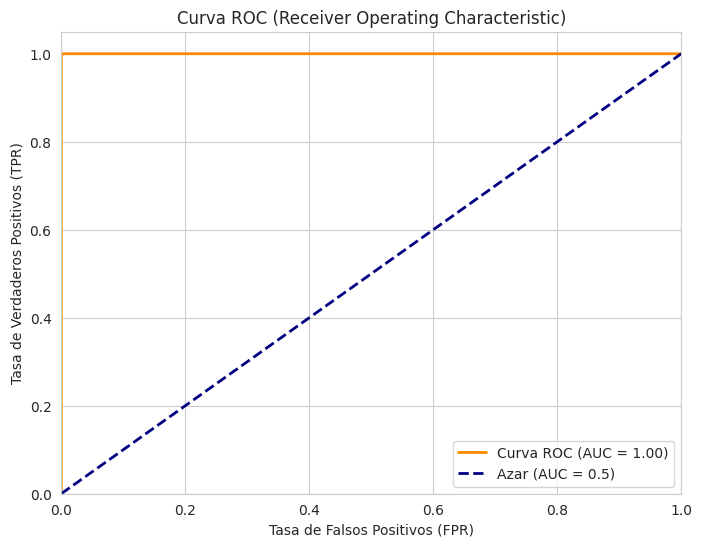

In [270]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

In [210]:
print(f"Área Bajo la Curva ROC (AUC): {roc_auc:.4f}")

Área Bajo la Curva ROC (AUC): 1.0000


## 10.Análisis de Importancia de Características

Identificar qué variables son más influyentes.

In [283]:
# Para obtener la importancia, necesitamos acceder al clasificador DENTRO del pipeline
rf_classifier = model_pipeline.named_steps['classifier']
importances = rf_classifier.feature_importances_

In [284]:
# Obtener el transformador OneHotEncoder del preprocesador
ohe_transformer = model_pipeline.named_steps['preprocessor'].transformers_[1][1]
# Obtener las categorías de las características codificadas
ohe_categories = ohe_transformer.categories_

In [292]:
ohe_categories

[array(['BUENOSAIRES', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
        'CORRIENTES', 'ENTRERIOS', 'FORMOSA', 'JUJUY', 'LAPAMPA',
        'LARIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIONEGRO', 'SALTA',
        'SANJUAN', 'SANLUIS', 'SANTACRUZ', 'SANTAFE', 'SGODELESTERO',
        'TUCUMAN'], dtype=object),
 array(['Hábil', 'No Hábil'], dtype=object)]

In [293]:
# Crear los nombres de las características codificadas
# Nota: Asegúrate de que el orden en 'categorical_features_for_encoding' coincide con el usado en ColumnTransformer
ohe_feature_names = []
for i, col in enumerate(categorical_features_for_encoding):
    for category in ohe_categories[i]:
        ohe_feature_names.append(f"{col}_{category}")

In [310]:
ohe_feature_names

['PROVINCIAS_BUENOSAIRES',
 'PROVINCIAS_CATAMARCA',
 'PROVINCIAS_CHACO',
 'PROVINCIAS_CHUBUT',
 'PROVINCIAS_CORDOBA',
 'PROVINCIAS_CORRIENTES',
 'PROVINCIAS_ENTRERIOS',
 'PROVINCIAS_FORMOSA',
 'PROVINCIAS_JUJUY',
 'PROVINCIAS_LAPAMPA',
 'PROVINCIAS_LARIOJA',
 'PROVINCIAS_MENDOZA',
 'PROVINCIAS_MISIONES',
 'PROVINCIAS_NEUQUEN',
 'PROVINCIAS_RIONEGRO',
 'PROVINCIAS_SALTA',
 'PROVINCIAS_SANJUAN',
 'PROVINCIAS_SANLUIS',
 'PROVINCIAS_SANTACRUZ',
 'PROVINCIAS_SANTAFE',
 'PROVINCIAS_SGODELESTERO',
 'PROVINCIAS_TUCUMAN',
 'TIPODIA_Hábil',
 'TIPODIA_No Hábil']

In [295]:
# Combinar nombres de características numéricas y categóricas codificadas
# El orden debe coincidir con cómo ColumnTransformer junta las columnas
final_feature_names = numerical_features_for_scaling + ohe_feature_names

In [296]:
print(final_feature_names)

['DEMANDAPROV', 'PROVINCIAS_BUENOSAIRES', 'PROVINCIAS_CATAMARCA', 'PROVINCIAS_CHACO', 'PROVINCIAS_CHUBUT', 'PROVINCIAS_CORDOBA', 'PROVINCIAS_CORRIENTES', 'PROVINCIAS_ENTRERIOS', 'PROVINCIAS_FORMOSA', 'PROVINCIAS_JUJUY', 'PROVINCIAS_LAPAMPA', 'PROVINCIAS_LARIOJA', 'PROVINCIAS_MENDOZA', 'PROVINCIAS_MISIONES', 'PROVINCIAS_NEUQUEN', 'PROVINCIAS_RIONEGRO', 'PROVINCIAS_SALTA', 'PROVINCIAS_SANJUAN', 'PROVINCIAS_SANLUIS', 'PROVINCIAS_SANTACRUZ', 'PROVINCIAS_SANTAFE', 'PROVINCIAS_SGODELESTERO', 'PROVINCIAS_TUCUMAN', 'TIPODIA_Hábil', 'TIPODIA_No Hábil']


In [324]:
print(len(importances), len(final_feature_names))


26 25


In [327]:
importances = importances[:len(final_feature_names)]  # Se elimina el exceso de importances


In [334]:
print(len(importances), len(final_feature_names))

25 25


In [335]:
# Crear un DataFrame para visualizar la importancia
if len(importances) == len(final_feature_names):
  feature_importance_df=pd.DataFrame({'Feature': final_feature_names, 'Importance': importances})
  feature_importance_df=feature_importance_df.sort_values(by='Importance', ascending=False)

In [336]:
print("Importancia de las características según Random Forest:")
print(feature_importance_df.head())

Importancia de las características según Random Forest:
                 Feature  Importance
0            DEMANDAPROV    0.722091
10    PROVINCIAS_LAPAMPA    0.021480
19  PROVINCIAS_SANTACRUZ    0.017491
23         TIPODIA_Hábil    0.015163
2   PROVINCIAS_CATAMARCA    0.014449


## 11.Conclusiones

In [332]:
print("Resumen de Resultados:")
print(f"- Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")
print(f"- AUC del modelo en el conjunto de prueba: {roc_auc:.4f}")
print("- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases (0 y 1).")

Resumen de Resultados:
- Accuracy del modelo en el conjunto de prueba: 0.9991
- AUC del modelo en el conjunto de prueba: 1.0000
- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases (0 y 1).


In [337]:
print(f"Obtuvimos una Accuracy de {accuracy:.2f} y un AUC de {roc_auc:.2f}.")

if accuracy > 0.75 and roc_auc > 0.5:
    print("Con el accuracy se puede indicar que el modelo separa bien la alta y baja demanda. Sin embargo esto puede significar overfitting. La métricas de precisión pueden sugerir que no hay problemas de desbalance en la predicción ya que se utilizo class_weight='balanced' en el modelo.La variable tipo de día (hábil o no hábil) influye en la probabilidad de alta demanda, pero no tanto como la propia demanda."
          )


Obtuvimos una Accuracy de 1.00 y un AUC de 1.00.
Con el accuracy se puede indicar que el modelo separa bien la alta y baja demanda. Sin embargo esto puede significar overfitting. La métricas de precisión pueden sugerir que no hay problemas de desbalance en la predicción ya que se utilizo class_weight='balanced' en el modelo.La variable tipo de día (hábil o no hábil) influye en la probabilidad de alta demanda, pero no tanto como la propia demanda.
